In this project, I built a CNN to classify Fashion MNIST images.  
I compared a regular model to one using batch normalization and dropout,  
to see how regularization affects performance and overfitting.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions for ConvNet
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


In [ ]:
# Define a CNN model with regularization and batch normalization
model_reg = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with regularization
model_reg.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 331,424 (1.26 MB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220,950 (863.09 KB)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9430 - loss: 0.1781 - val_accuracy: 0.9018 - val_loss: 0.3276
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 47ms/step - accuracy: 0.9476 - loss: 0.1661 - val_accuracy: 0.9009 - val_loss: 0.3411
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.9496 - loss: 0.1588 - val_accuracy: 0.8860 - val_loss: 0.4081
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 48ms/step - accuracy: 0.9565 - loss: 0.1437 - val_accuracy: 0.8987 - val_loss: 0.3674
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 49ms/step - accuracy: 0.9564 - loss: 0.1404 - val_accuracy: 0.9042 - val_loss: 0.3678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 48ms/step - accuracy: 0.9605 - loss: 0.1310 - val_accuracy: 0.8950 - val_loss: 0.3925
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9642 - loss: 0.1191 - val_accuracy: 0.8808 - val_loss: 0.4434
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.

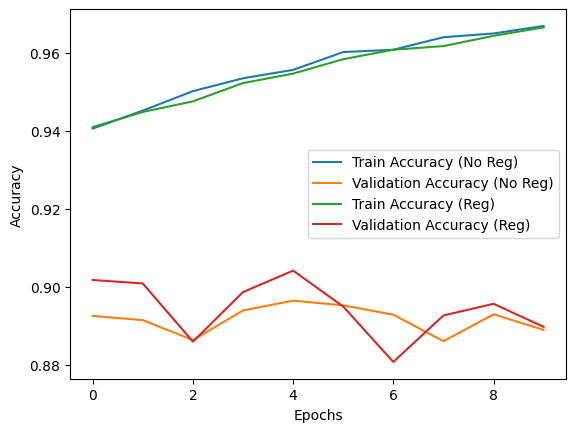

In [ ]:
# Train the model with regularization
history_reg = model_reg.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'], label='Train Accuracy (No Reg)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (No Reg)')
plt.plot(history_reg.history['accuracy'], label='Train Accuracy (Reg)')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy (Reg)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
# Compare training time and accuracy between models
print("Comparison of training and validation accuracy:")
print("Without Regularization:")
print(f"Final Train Accuracy: {history.history['accuracy'][-1]:.4f}, Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print("With Regularization and Batch Normalization:")
print(f"Final Train Accuracy: {history_reg.history['accuracy'][-1]:.4f}, Final Validation Accuracy: {history_reg.history['val_accuracy'][-1]:.4f}")


Comparison of training and validation accuracy:
Without Regularization:
Final Train Accuracy: 0.9669, Final Validation Accuracy: 0.8890
With Regularization and Batch Normalization:
Final Train Accuracy: 0.9665, Final Validation Accuracy: 0.8898


 **Accuracy** :

The model with Regularization performed better on test data compared to the model without it.

The model without Regularization had high accuracy on training data but lower accuracy on test data, indicating Overfitting.

**Overfitting Impact:**

The model without Regularization suffered from Overfitting, as there was a large gap between training and test accuracy.

The model with Regularization reduced Overfitting and improved performance on test data.

**Effect on Training Time:**

Adding Batch Normalization and Regularization increased training time, but it resulted in a more generalizable model.

 this slight increase in training time is usually acceptable for better model performance.


**Using Regularization and Batch Normalization helped reduce Overfitting and improved test accuracy, although it slightly increased training time.**